## Convolutional Neural Network

---
**Problem Statement:**  

Summit Technologies is inviting candidates to interview them for the position of Data Scientist. Let's assume you are one of the candidates. During the interview, you are asked the following question:
Consider the data sets consisting of two classes, Cats and Dogs from the Dropbox, and build a model to classify the images using TensorFlow 2.x.
Now, you must build the model that predicts which class an animal belongs to.


**Dataset Description:**

Dataset consist of training and testing data separately. Training data contains 8005 images which belong to 2 classes (**Cats and Dogs**) whereas Testing data contains 2023 images which belong to 2 classes (**Cats and Dogs**)

**Import the required Libraries**

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

**Import the Dataset**

In [2]:
data_URL = 'https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip'
path_to_zip = tf.keras.utils.get_file('D://Cfiles/Edu/Enterprise/DL/data_set', origin= data_URL, extract=True)

 311296/Unknown - 1s 2us/step

#### Explore the dataset

In [3]:
train_data_dir =    "D://Cfiles/Edu/Enterprise/DL/CNN/training_set/training_set"
validation_data_dir = "D://Cfiles/Edu/Enterprise/DL/CNN/test_set/test_set"

In [8]:
plt.imread(train_data_dir+'/dogs/dog.1.jpg').shape

(499, 327, 3)

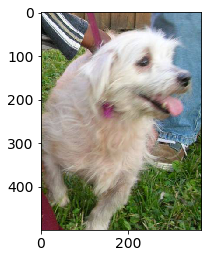

In [12]:
plt.imshow(plt.imread(train_data_dir+'/dogs/dog.9.jpg'));

---

### Data Preperation

* Read images from the disk.
* Resize the images to a format
* Rescale the tensors from values between 0 and 255 to values between 0 and 1
* Augment the dataset if training dataset is small (optional)
* #### All these tasks can be done with the ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# ImageDataGenerator?

In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255,  
                                           horizontal_flip =True,
                                           shear_range = 0.2,                                          
                                           zoom_range= 0.2)

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [35]:
img_height, img_width = 150, 150
batch_size = 32 # you can try 64/128/256, but it will take time

In [19]:
# train_image_generator.flow_from_directory?

In [36]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_data_dir,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary',
                                                           classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [37]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_data_dir,
                                                              target_size=(img_height, img_width),
                                                              class_mode='binary')

Found 2023 images belonging to 2 classes.


#### Lets look at augmented images

In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [39]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]

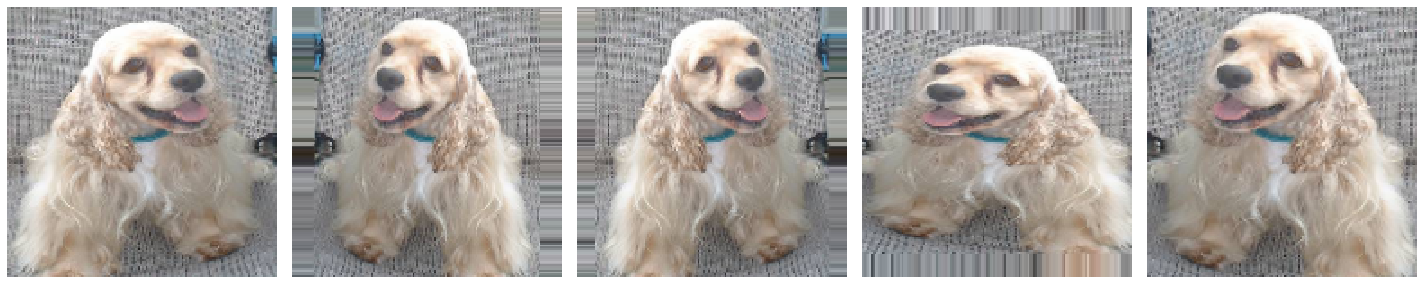

In [40]:
plotImages(augmented_images)

---

### Building CNN Model -  inspired by VGG-16 - Developed by Visual Geometry Group

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

---

### **Compiling the Model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Fitting CNN Model**

In [65]:
%%time
model.fit_generator(generator= train_data_gen,
#                     steps_per_epoch= 8005//batch_size,
                    steps_per_epoch= 100,                    
                    epochs= 10,
                    validation_data= val_data_gen,
#                     validation_steps= 2023//batch_size
                    validation_steps= 100)

Epoch 1/10
100/100 [==============================] - 122s 1s/step - loss: 0.6930 - accuracy: 0.5178 - val_loss: 0.6829 - val_accuracy: 0.5405
Epoch 2/10
100/100 [==============================] - 119s 1s/step - loss: 0.6782 - accuracy: 0.5755 - val_loss: 0.6659 - val_accuracy: 0.6104
Epoch 3/10
100/100 [==============================] - 123s 1s/step - loss: 0.6643 - accuracy: 0.6066 - val_loss: 0.8909 - val_accuracy: 0.5682
Epoch 4/10
100/100 [==============================] - 125s 1s/step - loss: 0.6656 - accuracy: 0.5984 - val_loss: 0.6455 - val_accuracy: 0.6447
Epoch 5/10
100/100 [==============================] - 117s 1s/step - loss: 0.6300 - accuracy: 0.6464 - val_loss: 0.6161 - val_accuracy: 0.6835
Epoch 6/10
100/100 [==============================] - 118s 1s/step - loss: 0.6210 - accuracy: 0.6543 - val_loss: 0.5865 - val_accuracy: 0.6813
Epoch 7/10
100/100 [==============================] - 148s 1s/step - loss: 0.5981 - accuracy: 0.6841 - val_loss: 0.6042 - val_accuracy: 0.6658

---

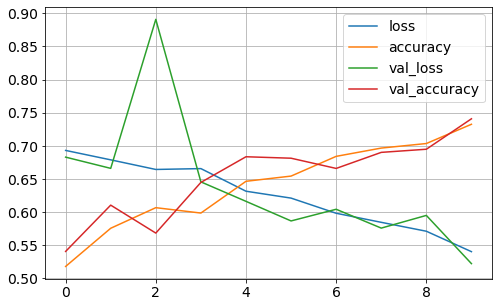

In [66]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

---

###  Saving the model and making Predictions after a month !

In [ ]:
# model.save('VGG_like_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model2 = load_model('VGG_like_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
test_image = image.load_img(validation_data_dir+'/dogs/dog.4017.jpg', target_size=(150,150))

In [ ]:
test_image

In [ ]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)

#### 0 is for cat 1 is for dog

In [ ]:
model2.predict(test_image)